In [1]:
import pandas as pd

df_train = pd.read_csv('combined_train_data.csv')
df_valid = pd.read_csv('combined_val_data.csv')

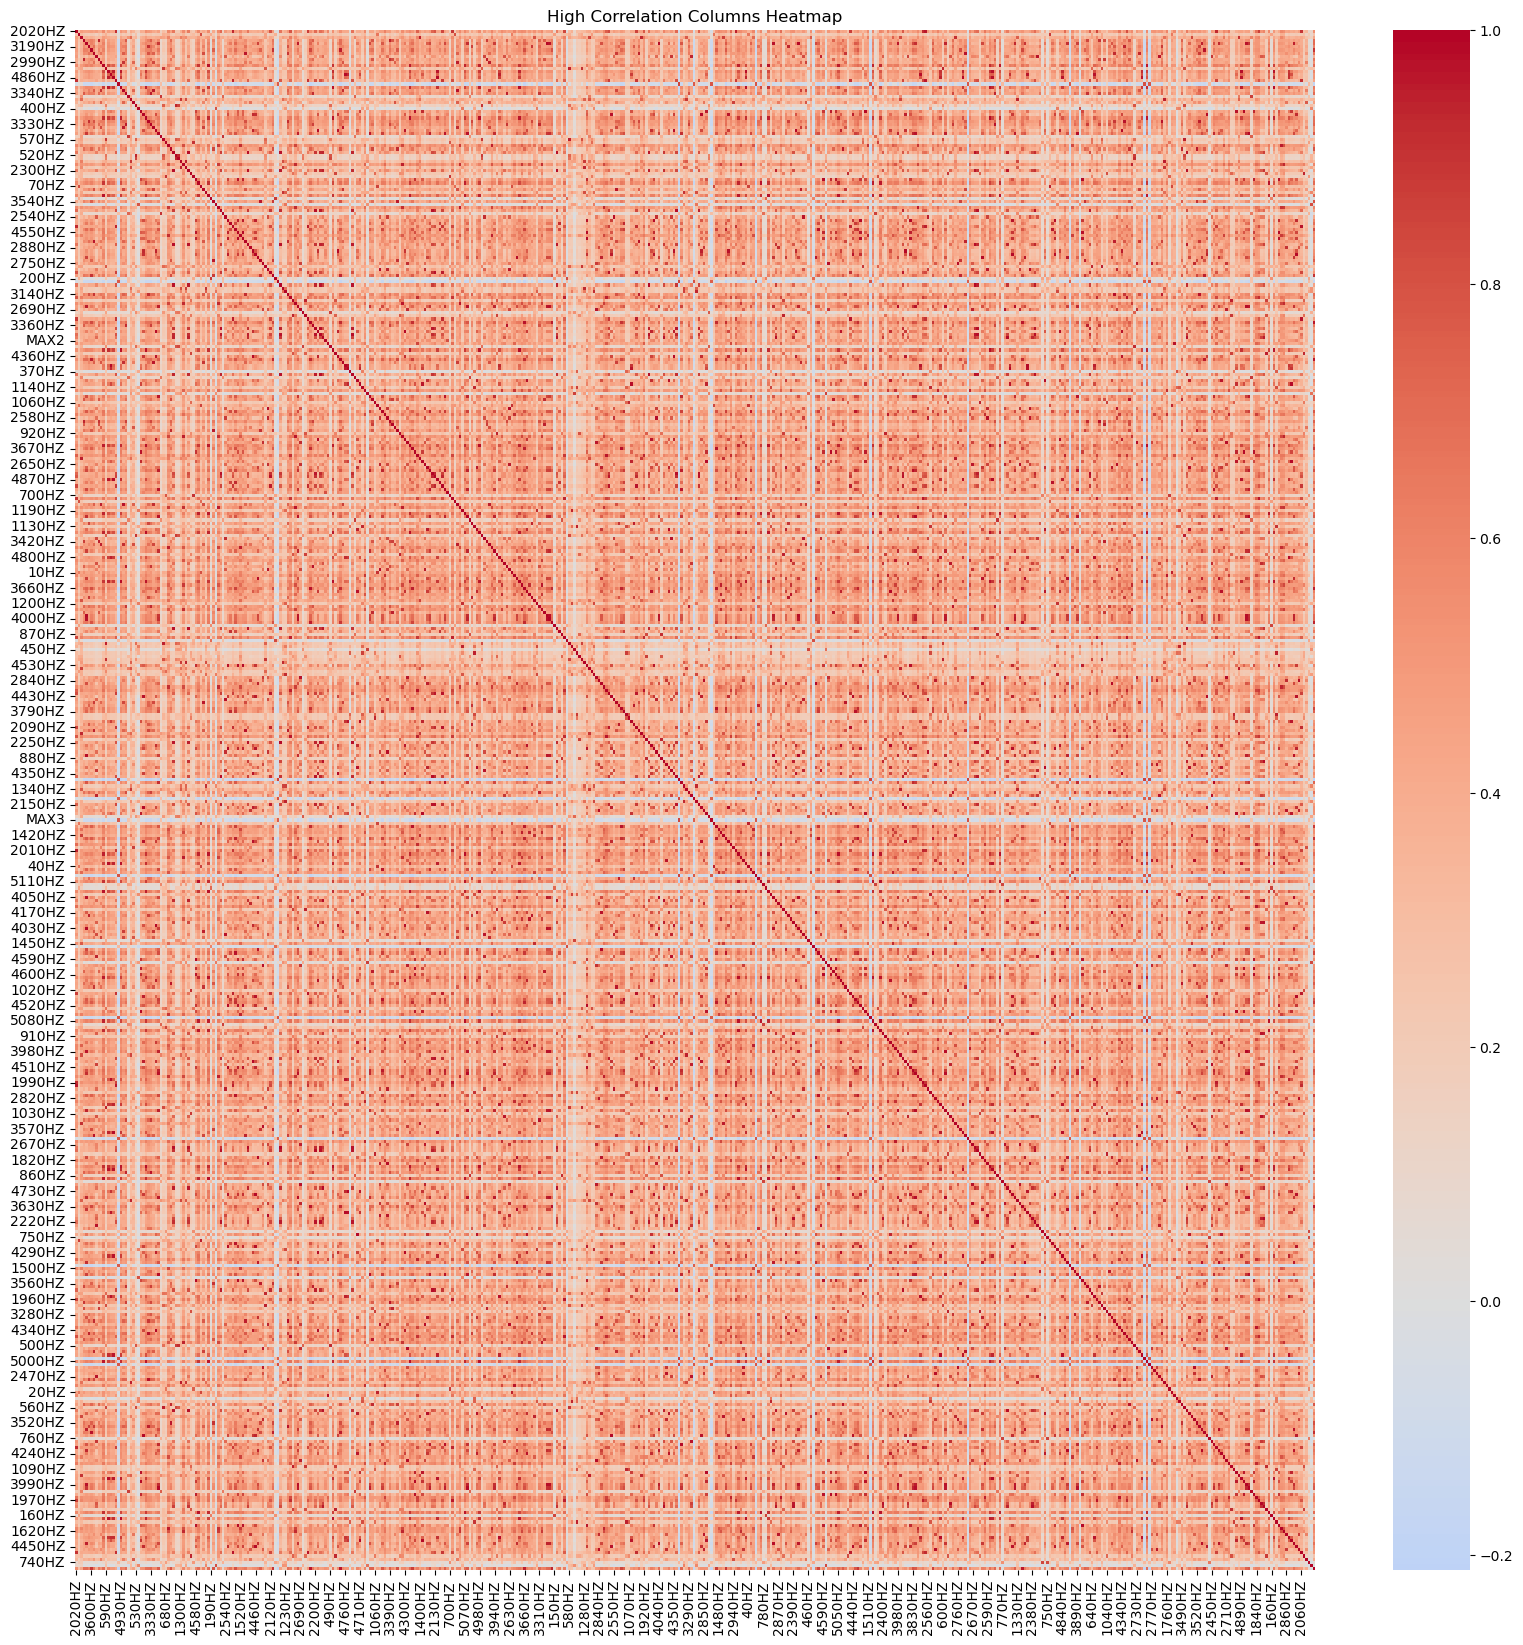

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 관계가 높은 열을 선택하는 함수
def get_highly_correlated_columns(corr_matrix, threshold=0.8):
    # 절대값을 기준으로 정렬
    corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
    return high_corr

# 수치형 열만 선택
numeric_df = df_train.select_dtypes(include=['number'])

# 상관 행렬 계산
correlation_matrix = numeric_df.corr()

# 상관 관계가 높은 열들 선택
high_corr = get_highly_correlated_columns(correlation_matrix)

# 상관 관계가 높은 열 이름 리스트 생성
high_corr_columns = list(set([index[0] for index in high_corr.index] + [index[1] for index in high_corr.index]))

# 상관 행렬 히트맵 그리기 (상관 관계가 높은 열들만)
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df[high_corr_columns].corr(), cmap='coolwarm', center=0)
plt.title('High Correlation Columns Heatmap')
plt.show()

C:\Users\dahee\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x2000 with 0 Axes>

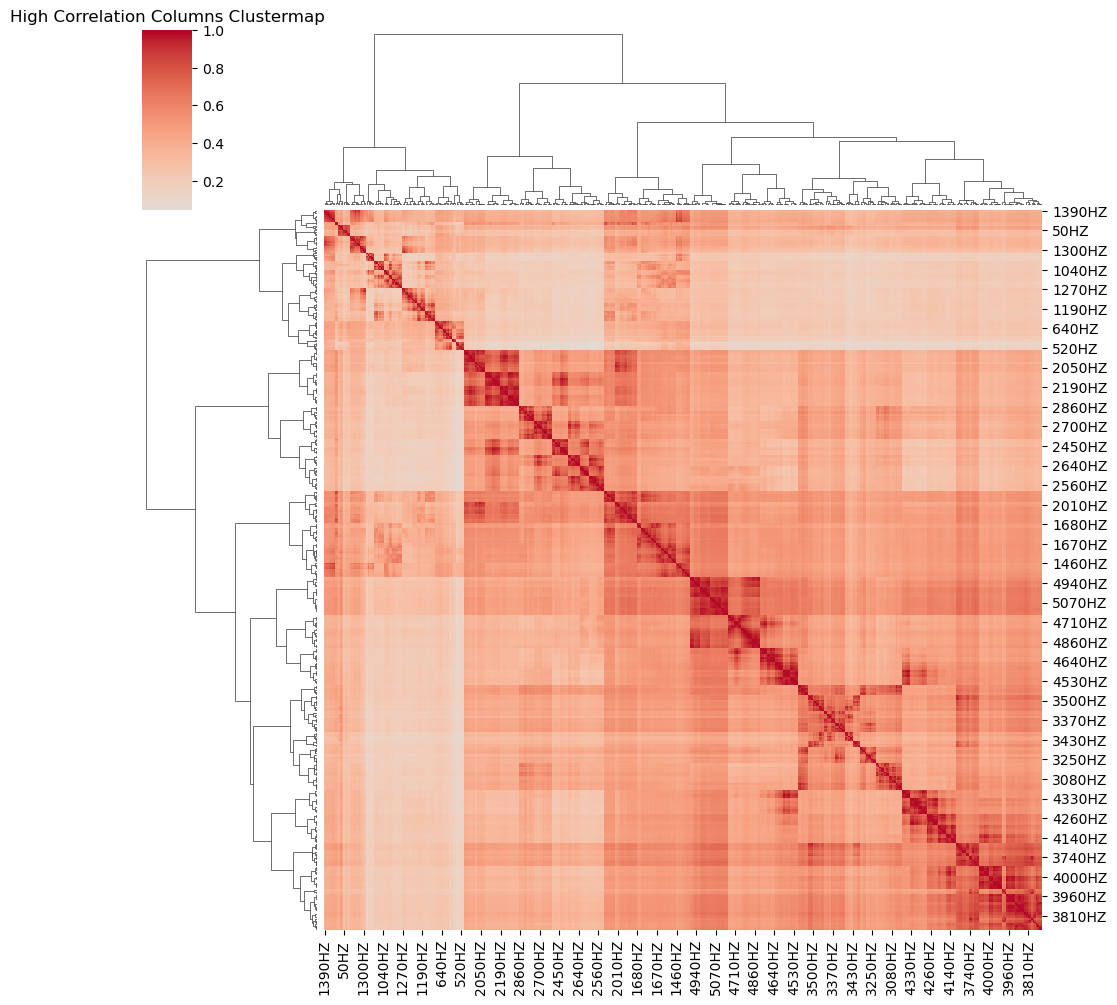

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 관계가 높은 열을 선택하는 함수
def get_highly_correlated_columns(corr_matrix, threshold=0.9):
    corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
    return high_corr

# 수치형 열만 선택
numeric_df9 = df_train.select_dtypes(include=['number'])

# 상관 행렬 계산
correlation_matrix9 = numeric_df.corr()

# 상관 관계가 높은 열들 선택 (임계값 조정)
high_corr9 = get_highly_correlated_columns(correlation_matrix, threshold=0.9)

# 상관 관계가 높은 열 이름 리스트 생성
high_corr_columns9 = list(set([index[0] for index in high_corr.index] + [index[1] for index in high_corr.index]))

# 클러스터 맵 그리기
plt.figure(figsize=(20, 20))
sns.clustermap(numeric_df[high_corr_columns].corr(), cmap='coolwarm', center=0, method='ward', metric='euclidean')
plt.title('High Correlation Columns Clustermap')
plt.show()

In [7]:
correlation_matrix

,ldate,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
ldate,1.000000,-0.003751,0.170101,NaN,-0.109684,-0.090468,-0.082025,-0.097803,-0.100209,-0.012504,...,-0.063257,0.141285,-0.063170,0.141898,-0.059343,0.141364,-0.058345,0.144245,-0.062810,0.143864
lrate,-0.003751,1.000000,0.440885,NaN,0.111899,0.111416,0.113563,0.123277,0.128757,0.067568,...,0.046529,0.580048,0.050525,0.578379,0.049681,0.578930,0.037520,0.570658,0.045571,0.571466
llevel,0.170101,0.440885,1.000000,NaN,-0.095871,-0.075111,-0.047632,-0.032398,-0.017679,0.072858,...,-0.107164,0.850586,-0.106137,0.850854,-0.105149,0.846023,-0.106371,0.844563,-0.106754,0.838829
0HZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10HZ,-0.109684,0.111899,-0.095871,NaN,1.000000,0.945174,0.897604,0.828448,0.760781,0.500713,...,0.356542,-0.058853,0.355832,-0.060306,0.356974,-0.058227,0.348075,-0.060014,0.352060,-0.059838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAX15,0.141364,0.578930,0.846023,NaN,-0.058227,-0.041934,-0.018467,-0.004883,0.008517,0.073841,...,-0.082713,0.787275,-0.083108,0.800742,-0.102406,1.000000,-0.089753,0.803971,-0.087409,0.792654
MAX16,-0.058345,0.037520,-0.106371,NaN,0.348075,0.310350,0.263539,0.219777,0.181723,-0.005285,...,0.760008,-0.089287,0.767190,-0.087990,0.778383,-0.089753,1.000000,-0.115527,0.790035,-0.092615
MAX17,0.144245,0.570658,0.844563,NaN,-0.060014,-0.044125,-0.021372,-0.006856,0.005837,0.071069,...,-0.085483,0.780080,-0.083951,0.788309,-0.086850,0.803971,-0.115527,1.000000,-0.093677,0.802941
MAX18,-0.062810,0.045571,-0.106754,NaN,0.352060,0.310802,0.266015,0.222005,0.184886,-0.004550,...,0.764918,-0.083782,0.779974,-0.085519,0.786081,-0.087409,0.790035,-0.093677,1.000000,-0.107292


In [6]:
high_corr

4500HZ  4490HZ    0.988239
4490HZ  4500HZ    0.988239
4510HZ  4520HZ    0.988098
4520HZ  4510HZ    0.988098
4340HZ  4330HZ    0.987924
                    ...   
4060HZ  3970HZ    0.900042
3960HZ  3880HZ    0.900007
3880HZ  3960HZ    0.900007
3540HZ  3560HZ    0.900006
3560HZ  3540HZ    0.900006
Length: 3004, dtype: float64

In [8]:
# 상관 관계가 높은 열을 선택하는 함수 (임계값 범위 설정)
def get_highly_correlated_columns(corr_matrix, lower_threshold=0.8, upper_threshold=0.9):
    # 절대값을 기준으로 정렬
    corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
    high_corr = corr_pairs[(corr_pairs >= lower_threshold) & (corr_pairs < upper_threshold)]
    return high_corr

# 수치형 열만 선택
numeric_df = df_train.select_dtypes(include=['number'])

# 상관 행렬 계산
correlation_matrix = numeric_df.corr()

# 상관 관계가 높은 열들 선택 (임계값 범위 설정)
high_corr = get_highly_correlated_columns(correlation_matrix, lower_threshold=0.8, upper_threshold=0.9)

# 상관 관계가 높은 열 이름 리스트 생성
high_corr_columns = list(set([index[0] for index in high_corr.index] + [index[1] for index in high_corr.index]))

In [9]:
high_corr

1960HZ  1920HZ    0.899851
1920HZ  1960HZ    0.899851
1500HZ  1490HZ    0.899842
1490HZ  1500HZ    0.899842
2370HZ  2310HZ    0.899546
                    ...   
3950HZ  4110HZ    0.800059
MAX11   MAX13     0.800005
MAX13   MAX11     0.800005
1950HZ  2030HZ    0.800000
2030HZ  1950HZ    0.800000
Length: 3566, dtype: float64

In [37]:
# high_corr 변수에 있는 상관 계수 쌍을 세트(set)로 변환하여 중복을 제거합니다.
unique_correlation_pairs = set([(min(pair), max(pair)) for pair in high_corr.index])

# 중복을 제외한 상관 계수 쌍을 리스트(list)로 변환합니다.
unique_correlation_pairs_list = list(unique_correlation_pairs)

In [16]:
len(unique_correlation_pairs_list)

1783

In [ ]:
def reduce_frequency_dimension(df, unique_correlation_pairs_list):
    new_df = df.copy()  # 원본 데이터프레임을 복사하여 새로운 데이터프레임을 생성합니다.

    for pair in unique_correlation_pairs_list:
        freq1, freq2 = pair  # 상관 계수 쌍에서 주파수를 가져옵니다.

        # 두 주파수 중 하나를 선택합니다.
        selected_freq = freq1  # 예시로는 freq1을 선택하겠습니다.

        # 선택한 주파수를 기준으로 다른 주파수를 대체합니다.
        new_df[selected_freq] = df[freq1]  # 선택한 주파수를 그대로 유지합니다.
        if freq2 in new_df.columns:  # 대체할 주파수가 데이터프레임에 존재하는지 확인합니다.
            new_df[selected_freq] = new_df[selected_freq].combine_first(df[freq2])  # 선택한 주파수와 다른 주파수를 결합합니다.

        # 기존의 주파수 열을 제거합니다.
        if freq2 in new_df.columns:  # 대체된 주파수가 데이터프레임에 존재하는지 확인합니다.
            new_df.drop(freq2, axis=1, inplace=True)

    return new_df

# 주파수 차원을 줄인 데이터프레임을 생성합니다.
reduced_df_train = reduce_frequency_dimension(df_train, unique_correlation_pairs_list)

In [21]:
reduced_df_train.shape

(62564, 300)

In [23]:
reduced_df_train.columns

Index(['site', 'sid', 'ldate', 'lrate', 'leaktype', '0HZ', '10HZ', '20HZ',
       '60HZ', '100HZ',
       ...
       '2150HZ', '3780HZ', '3950HZ', '2810HZ', '3320HZ', '3160HZ', '4220HZ',
       '3610HZ', '1500HZ', '2390HZ'],
      dtype='object', length=300)

In [24]:
# 상관 관계가 높은 열을 선택하는 함수
def get_highly_correlated_columns(corr_matrix, threshold=0.9):
    corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
    return high_corr

# 수치형 열만 선택
numeric_df9 = df_train.select_dtypes(include=['number'])

# 상관 행렬 계산
correlation_matrix9 = numeric_df.corr()

# 상관 관계가 높은 열들 선택 (임계값 조정)
high_corr9 = get_highly_correlated_columns(correlation_matrix, threshold=0.9)

# 상관 관계가 높은 열 이름 리스트 생성
high_corr_columns9 = list(set([index[0] for index in high_corr.index] + [index[1] for index in high_corr.index]))

In [25]:
# high_corr 변수에 있는 상관 계수 쌍을 세트(set)로 변환하여 중복을 제거합니다.
unique_correlation_pairs9 = set([(min(pair), max(pair)) for pair in high_corr9.index])

# 중복을 제외한 상관 계수 쌍을 리스트(list)로 변환합니다.
unique_correlation_pairs_list9 = list(unique_correlation_pairs9)

In [28]:
def reduce_frequency_dimension(df, high_corr_pairs_list):
    new_df = df.copy()  # 원본 데이터프레임을 복사하여 새로운 데이터프레임을 생성합니다.

    for pair in high_corr_pairs_list:
        freq1, freq2 = pair  # 상관 계수 쌍에서 주파수를 가져옵니다.

        # 두 주파수 중 하나를 선택합니다.
        selected_freq = freq1  # 예시로는 freq1을 선택하겠습니다.

        # freq1이 존재하는 경우에만 해당 열을 처리합니다.
        if freq1 in new_df.columns:
            # 선택한 주파수를 기준으로 다른 주파수를 대체합니다.
            new_df[selected_freq] = df[freq1]  # 선택한 주파수를 그대로 유지합니다.
            if freq2 in new_df.columns:  # 대체할 주파수가 데이터프레임에 존재하는지 확인합니다.
                new_df[selected_freq] = new_df[selected_freq].combine_first(df[freq2])  # 선택한 주파수와 다른 주파수를 결합합니다.

        # 기존의 주파수 열을 제거합니다.
        if freq2 in new_df.columns:  # 대체된 주파수가 데이터프레임에 존재하는지 확인합니다.
            new_df.drop(freq2, axis=1, inplace=True)

    return new_df

# 주파수 차원을 줄인 데이터프레임을 생성합니다.
final_reduced_df_train = reduce_frequency_dimension(reduced_df_train, unique_correlation_pairs_list9)


In [29]:
final_reduced_df_train.shape

(62564, 82)

In [31]:
final_reduced_df_train.columns

Index(['site', 'sid', 'ldate', 'lrate', 'leaktype', '0HZ', '10HZ', '60HZ',
       '100HZ', '110HZ', '120HZ', '130HZ', '140HZ', '150HZ', '180HZ', '190HZ',
       '230HZ', '240HZ', '250HZ', '260HZ', '270HZ', '280HZ', '290HZ', '300HZ',
       '310HZ', '320HZ', '330HZ', '340HZ', '350HZ', '360HZ', '370HZ', '390HZ',
       '410HZ', '480HZ', '540HZ', '720HZ', '730HZ', '1000HZ', '1080HZ',
       '2890HZ', '2900HZ', '2910HZ', '2920HZ', '2930HZ', '2960HZ', '2970HZ',
       'MAX0', 'MAX1', 'MAX2', 'MAX3', 'MAX5', 'MAX6', 'MAX7', 'MAX8', 'MAX10',
       'MAX11', 'MAX12', 'MAX14', 'MAX16', 'MAX18', '160HZ', '420HZ', '900HZ',
       'MAX13', '830HZ', '200HZ', 'MAX17', '2940HZ', '700HZ', '740HZ', 'MAX9',
       'MAX15', '750HZ', '2950HZ', '1210HZ', '1510HZ', '780HZ', '760HZ',
       '810HZ', '430HZ', '840HZ', '1500HZ'],
      dtype='object')

In [32]:
import re

# 주파수 열과 MAX로 시작하는 열을 분리합니다.
freq_columns = [col for col in final_reduced_df_train.columns if re.match(r'\d+HZ', col)]
max_columns = [col for col in final_reduced_df_train.columns if col.startswith('MAX')]

# 주파수 열을 숫자의 작은 순서대로 정렬합니다.
freq_columns_sorted = sorted(freq_columns, key=lambda x: int(re.findall(r'\d+', x)[0]))

# 새로운 열 순서를 정의합니다.
new_column_order = freq_columns_sorted + max_columns

# 데이터프레임의 열 순서를 변경합니다.
df = final_reduced_df_train[new_column_order]

In [34]:
import re

# 주파수 열과 MAX로 시작하는 열을 분리합니다.
freq_columns = [col for col in final_reduced_df_train.columns if re.match(r'\d+HZ', col)]
max_columns = [col for col in final_reduced_df_train.columns if col.startswith('MAX')]

# 주파수 열을 숫자의 작은 순서대로 정렬합니다.
freq_columns_sorted = sorted(freq_columns, key=lambda x: int(re.findall(r'\d+', x)[0]))

# 새로운 열 순서를 정의합니다. (site, sid, ldate, lrate, leaktype, 주파수 열, MAX로 시작하는 열)
new_column_order = ['site', 'sid', 'ldate', 'lrate', 'leaktype'] + freq_columns_sorted + max_columns

# 데이터프레임의 열 순서를 변경합니다.
df = final_reduced_df_train[new_column_order]


In [35]:
df.columns

Index(['site', 'sid', 'ldate', 'lrate', 'leaktype', '0HZ', '10HZ', '60HZ',
       '100HZ', '110HZ', '120HZ', '130HZ', '140HZ', '150HZ', '160HZ', '180HZ',
       '190HZ', '200HZ', '230HZ', '240HZ', '250HZ', '260HZ', '270HZ', '280HZ',
       '290HZ', '300HZ', '310HZ', '320HZ', '330HZ', '340HZ', '350HZ', '360HZ',
       '370HZ', '390HZ', '410HZ', '420HZ', '430HZ', '480HZ', '540HZ', '700HZ',
       '720HZ', '730HZ', '740HZ', '750HZ', '760HZ', '780HZ', '810HZ', '830HZ',
       '840HZ', '900HZ', '1000HZ', '1080HZ', '1210HZ', '1500HZ', '1510HZ',
       '2890HZ', '2900HZ', '2910HZ', '2920HZ', '2930HZ', '2940HZ', '2950HZ',
       '2960HZ', '2970HZ', 'MAX0', 'MAX1', 'MAX2', 'MAX3', 'MAX5', 'MAX6',
       'MAX7', 'MAX8', 'MAX10', 'MAX11', 'MAX12', 'MAX14', 'MAX16', 'MAX18',
       'MAX13', 'MAX17', 'MAX9', 'MAX15'],
      dtype='object')

In [36]:
removed_columns = [col for col in df_train.columns if col not in final_reduced_df_train.columns]
added_columns = [col for col in final_reduced_df_train.columns if col not in df_train.columns]

print("Removed Columns:", removed_columns)
print("Added Columns:", added_columns)

Removed Columns: ['llevel', '20HZ', '30HZ', '40HZ', '50HZ', '70HZ', '80HZ', '90HZ', '170HZ', '210HZ', '220HZ', '380HZ', '400HZ', '440HZ', '450HZ', '460HZ', '470HZ', '490HZ', '500HZ', '510HZ', '520HZ', '530HZ', '550HZ', '560HZ', '570HZ', '580HZ', '590HZ', '600HZ', '610HZ', '620HZ', '630HZ', '640HZ', '650HZ', '660HZ', '670HZ', '680HZ', '690HZ', '710HZ', '770HZ', '790HZ', '800HZ', '820HZ', '850HZ', '860HZ', '870HZ', '880HZ', '890HZ', '910HZ', '920HZ', '930HZ', '940HZ', '950HZ', '960HZ', '970HZ', '980HZ', '990HZ', '1010HZ', '1020HZ', '1030HZ', '1040HZ', '1050HZ', '1060HZ', '1070HZ', '1090HZ', '1100HZ', '1110HZ', '1120HZ', '1130HZ', '1140HZ', '1150HZ', '1160HZ', '1170HZ', '1180HZ', '1190HZ', '1200HZ', '1220HZ', '1230HZ', '1240HZ', '1250HZ', '1260HZ', '1270HZ', '1280HZ', '1290HZ', '1300HZ', '1310HZ', '1320HZ', '1330HZ', '1340HZ', '1350HZ', '1360HZ', '1370HZ', '1380HZ', '1390HZ', '1400HZ', '1410HZ', '1420HZ', '1430HZ', '1440HZ', '1450HZ', '1460HZ', '1470HZ', '1480HZ', '1490HZ', '1520HZ', '153

In [40]:
import math

# 방정식을 푸는 함수
def find_column_count(combination_count):
    for n in range(2, combination_count + 1):
        combinations = math.factorial(n) / (2 * math.factorial(n - 2))
        if combinations == combination_count:
            return n
    return None

# 상관 계수 조합의 수
combination_count = 3566

# 열의 개수를 찾음
column_count = find_column_count(combination_count)
print("열의 개수:", column_count)


열의 개수: None


In [ ]:
ㅇ